# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

#### 1. download data from unpublished google sheet (extra credit)

In [260]:
import pandas as pd
import numpy as np
import json
import os

from matplotlib import pyplot as pl
%matplotlib inline

import urllib
import requests


import statsmodels.formula.api as smf
import statsmodels.api as sm

In [53]:
puidata = os.getenv('PUIDATA');puidata

'/nfshome/jl9200/PUIdata'

In [55]:
# extra credt download directly from google docs with a google API
## reference:  https://stackoverflow.com/questions/10730712/download-unpublished-google-spreadsheet-as-csv
### link = https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0
### change edit#gid = 0  to  export?gid=0&format=csv'


! wget --no-check-certificate -O firekilldata.csv \
'https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?gid=0&format=csv'

--2018-11-15 22:16:35--  https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?gid=0&format=csv
Resolving docs.google.com (docs.google.com)... 172.217.8.14, 2607:f8b0:4004:80d::200e
Connecting to docs.google.com (docs.google.com)|172.217.8.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘firekilldata.csv’

firekilldata.csv        [ <=>                ]   7.67K  --.-KB/s    in 0s      

2018-11-15 22:16:35 (69.1 MB/s) - ‘firekilldata.csv’ saved [7852]



In [133]:
firekill = pd.read_csv('firekilldata.csv');firekill.head(1)
firekill = firekill[['Country/Territory','Average total all civilian firearms','Number of homicides by firearm']]
firekill.columns = ['Country Name','Average total all civilian firearms','Number of homicides by firearm']

In [134]:
firekill.head(2)

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0


#### 2. download from website with no httplink from the file (scrapying a little bit)

In [ ]:
# another way to do it is by url.urlretrieve

In [135]:
weburl = 'https://datawrapper.dwcdn.net/pvLFI/6/'
datalink = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
url = weburl+datalink
res = requests.request('GET',url).text
resdata = res.replace('<br/>',',').replace('</li>',',').split(',')[3:-3]

# make lists for the response
x1 = [];x2 =[];x3 = []

for i in range(len(resdata)):
    if i%3==0:
        x1.append(resdata[i])
    elif i%3==1:
        x2.append(resdata[i])
    else:
        x3.append(resdata[i])
        
resdata = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
ms  = resdata.iloc[1:,:]
ms.columns = ['Country','Guns/100 inhabitants','Number of mass shootings']
ms.head()
   

,Country,Guns/100 inhabitants,Number of mass shootings
1,Australia,15,4
2,Austria,30.4,1
3,Belgium,17.2,2
4,Canada,30.8,4
5,Denmark,12,0


#### 3. download GDP and POP data from the worldbank

In [83]:
! curl -O "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79715  100 79715    0     0   332k      0 --:--:-- --:--:-- --:--:--  334k


In [84]:
!unzip SP.POP.TOTL?downloadformat=csv

Archive:  SP.POP.TOTL?downloadformat=csv
  inflating: Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  


In [136]:
pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv",header = 2)

In [137]:
pop = pop[['Country Name','2017']];pop.columns = ['Country Name','pop']

In [138]:
pop.head(2)

,Country Name,pop
0,Aruba,105264.0
1,Afghanistan,35530081.0


In [139]:
# gdp data from worldbank link: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
! curl -O "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   475k      0 --:--:-- --:--:-- --:--:--  474k


In [140]:
!unzip NY.GDP.MKTP.CD?downloadformat=csv

Archive:  NY.GDP.MKTP.CD?downloadformat=csv
replace Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [143]:
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv',header =2)

In [144]:
gdp = gdp[['Country Name','2017']];gdp.columns = ['Country Name','gdp']

In [145]:
gdp.head(2)

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.081530e+10


In [146]:
gdppop = gdp.merge(pop,left_on = 'Country Name',right_on = 'Country Name');gdppop.head(2)

,Country Name,gdp,pop
0,Aruba,NaN,105264.0
1,Afghanistan,2.081530e+10,35530081.0


In [147]:
firekill.head(2)

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0


In [148]:
df_ = gdppop.merge(firekill,left_on = 'Country Name',right_on = 'Country Name');df_.head(2)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm
0,Angola,1.242094e+11,29784193.0,2800000.0,NaN
1,Albania,1.303935e+10,2873457.0,270000.0,56.0


In [149]:
ms.head(2)

,Country,Guns/100 inhabitants,Number of mass shootings
1,Australia,15,4
2,Austria,30.4,1


In [150]:
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")


In [160]:
df_['gdp'] =df_['gdp'].astype(float)
df_['pop'] = df_['pop'].astype(float)
df_['Average total all civilian firearms'] = df_['Average total all civilian firearms'].astype(float)
df_['Number of homicides by firearm'] = df_['Number of homicides by firearm'].astype(float)
df_['Guns/100 inhabitants'] = df_['Guns/100 inhabitants'].astype(float)
df_['Number of mass shootings'] = df_['Number of mass shootings'].astype(int)

In [161]:
df_.head()

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,1.323421e+12,24598933.0,3050000.0,30.0,Australia,15.0,4
1,Austria,4.165957e+11,8809212.0,2500000.0,18.0,Austria,30.4,1
2,Belgium,4.926813e+11,11372068.0,1800000.0,70.0,Belgium,17.2,2
3,Canada,1.653043e+12,36708083.0,9950000.0,173.0,Canada,30.8,4
4,Switzerland,6.788873e+11,8466017.0,3400000.0,57.0,Switzerland,45.7,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


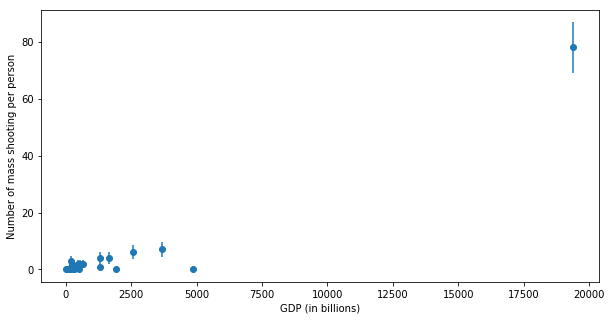

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [172]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


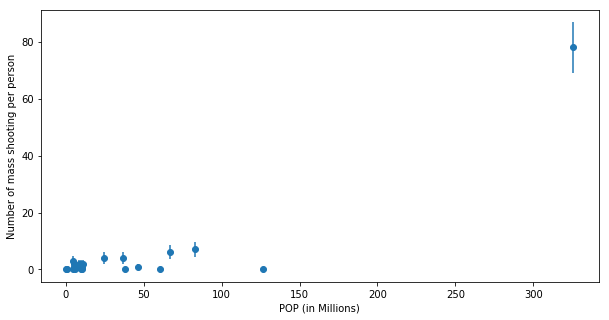

Number of mass shooting vs Population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest Population and the highest number of mass shootings


In [174]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['pop']/1e6, df_['Number of mass shootings'])
ax.errorbar(df_['pop']/1e6, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("POP (in Millions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs Population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest Population and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [192]:
df_.tail(2)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp
21,Sweden,5.380405e+11,10067744.0,2800000.0,37.0,Sweden,31.6,2,0.278116
22,United States,1.939060e+13,325719178.0,270000000.0,9146.0,United States,88.8,78,0.828935


In [175]:
df_['civ_firearmspp'] = df_['Average total all civilian firearms']/df_['pop']

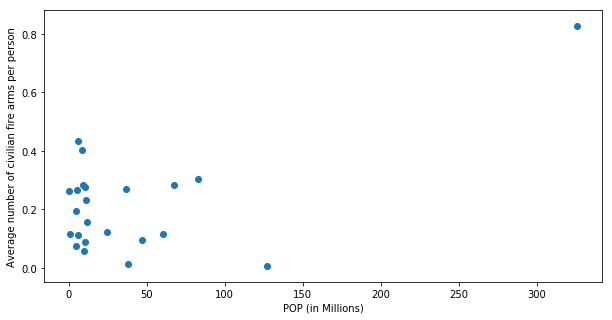

average number of civilian fire arms per person vs Population, The datapoint to the top right of the plot is the USA, which has noth the highest Population and the highest number of mass shootings


In [228]:
# without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['pop']/1e6, df_['civ_firearmspp'])

ax.set_xlabel("POP (in Millions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs Population, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest Population and the highest number of mass shootings")

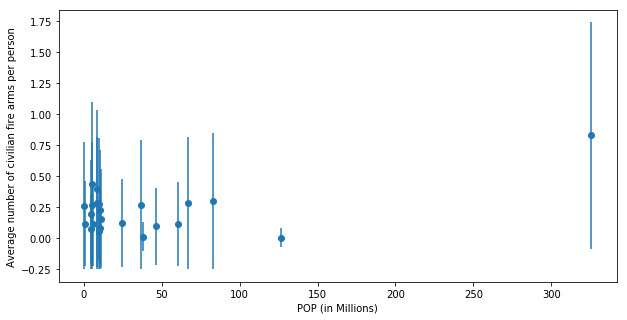

average number of civilian fire arms per person vs Population, The datapoint to the top right of the plot is the USA, which has noth the highest Population and the highest number of mass shootings


In [229]:
# without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['pop']/1e6, df_['civ_firearmspp'])
ax.errorbar(df_['pop']/1e6, df_['civ_firearmspp'], 
            yerr = np.sqrt(df_['civ_firearmspp'] * 1.0), fmt = '.')

ax.set_xlabel("POP (in Millions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs Population, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest Population and the highest number of mass shootings")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

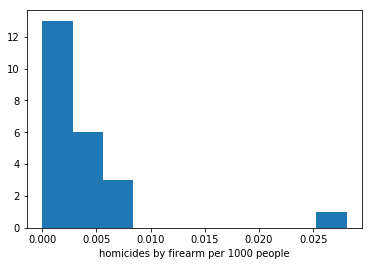

In [179]:
fig, ax = pl.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


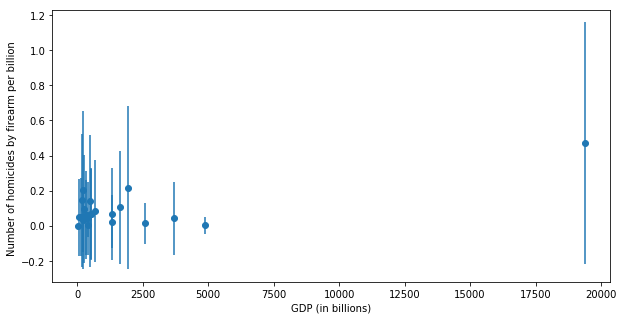

Number of homicides by firearm per billion vs GDP(in billion, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest Number of homicides by firearm


In [195]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'] / 1e9, df_['Number of homicides by firearm']/df_.gdp *1e9)
ax.errorbar(df_['gdp'] / 1e9, df_['Number of homicides by firearm']/df_.gdp *1e9, 
            yerr = np.sqrt(df_['Number of homicides by firearm']/df_.gdp *1e9 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel('Number of homicides by firearm per billion ')
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per billion vs GDP(in billion, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest Number of homicides by firearm")


In [196]:
df_.head(2)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp
0,Australia,1.323421e+12,24598933.0,3050000.0,30.0,Australia,15.0,4,0.123989
1,Austria,4.165957e+11,8809212.0,2500000.0,18.0,Austria,30.4,1,0.283794


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


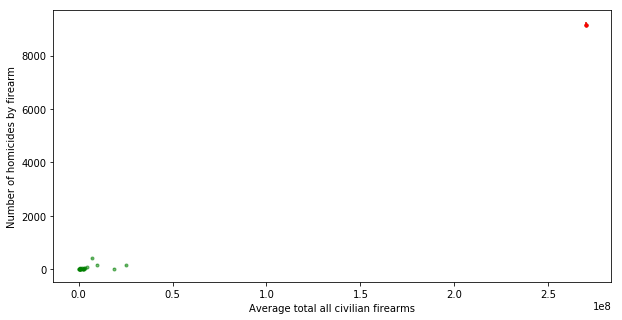

Average total all civilian firearms vs Number of homicides by firearm, The datapoint to the top right of the plot is the USA, which has noth the highest Average total all civilian firearms and Number of homicides by firearm


In [232]:
# with errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.plot(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'],'g.',alpha =0.3)
ax.plot(df_['Average total all civilian firearms'].tolist()[-1], df_['Number of homicides by firearm'].tolist()[-1],'r.')
ax.errorbar(df_['Average total all civilian firearms'],df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm']*1.0), fmt = 'g.',alpha = 0.3)
ax.errorbar(df_['Average total all civilian firearms'].tolist()[-1], df_['Number of homicides by firearm'].tolist()[-1], 
            yerr = np.sqrt(df_['Number of homicides by firearm'].tolist()[-1]*1.0), fmt = 'r.')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms vs Number of homicides by firearm, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest Average total all civilian firearms and Number of homicides by firearm")

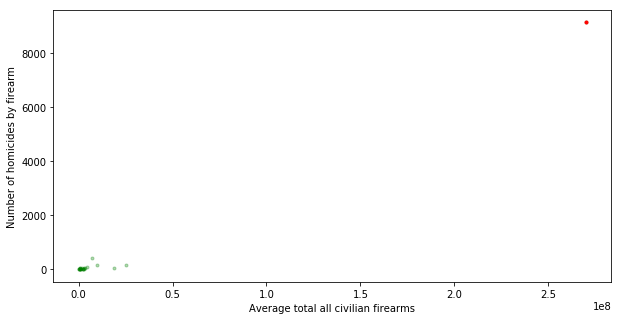

Average total all civilian firearms vs Number of homicides by firearm, The datapoint to the top right of the plot is the USA, which has noth the highest Average total all civilian firearms and Number of homicides by firearm


In [231]:
# without errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.plot(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'],'g.',alpha =0.3)
ax.plot(df_['Average total all civilian firearms'].tolist()[-1], df_['Number of homicides by firearm'].tolist()[-1],'r.')


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms vs Number of homicides by firearm, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest Average total all civilian firearms and Number of homicides by firearm")

In [181]:
df_.head(3)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp
0,Australia,1.323421e+12,24598933.0,3050000.0,30.0,Australia,15.0,4,0.123989
1,Austria,4.165957e+11,8809212.0,2500000.0,18.0,Austria,30.4,1,0.283794
2,Belgium,4.926813e+11,11372068.0,1800000.0,70.0,Belgium,17.2,2,0.158283


## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [234]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

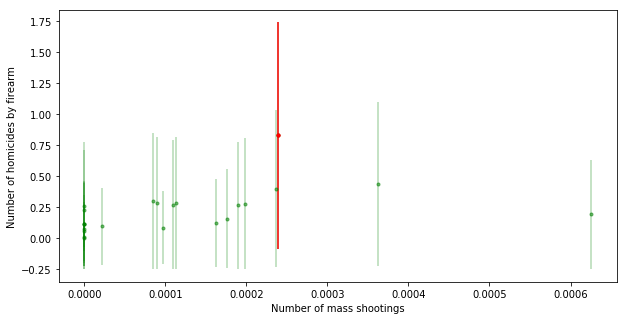

Number of mass shootings vs Number of homicides by firearm, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest Average total all civilian firearms and Number of homicides by firearm


In [237]:
# with errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.plot(df_['shootingspp'], df_['civ_firearmspp'],'g.',alpha =0.3)
ax.plot(df_['shootingspp'].tolist()[-1], df_['civ_firearmspp'].tolist()[-1],'r.')
ax.errorbar(df_['shootingspp'],df_['civ_firearmspp'],
            yerr = np.sqrt(df_['civ_firearmspp']*1.0), fmt = 'g.',alpha = 0.3)
ax.errorbar(df_['shootingspp'].tolist()[-1], df_['civ_firearmspp'].tolist()[-1], 
            yerr = np.sqrt(df_['civ_firearmspp'].tolist()[-1]*1.0), fmt = 'r.')

ax.set_xlabel("Number of mass shootings")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Number of homicides by firearm, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top of the plot is the USA, " + 
       "which has noth the highest Average total all civilian firearms and Number of homicides by firearm")

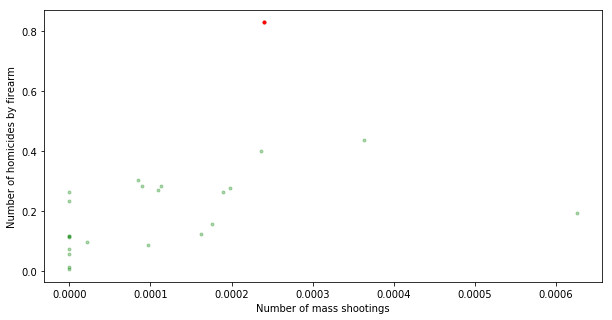

Number of mass shootings vs Number of homicides by firearm, errors represent Poisson statistics.
The datapoint to the top of the plot is the USA, which has noth the highest Average total all civilian firearms and Number of homicides by firearm


In [238]:
# without errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.plot(df_['shootingspp'], df_['civ_firearmspp'],'g.',alpha =0.3)
ax.plot(df_['shootingspp'].tolist()[-1], df_['civ_firearmspp'].tolist()[-1],'r.')



ax.set_xlabel("Number of mass shootings")
ax.set_ylabel('Number of homicides by firearm')
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Number of homicides by firearm, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top of the plot is the USA, " + 
       "which has noth the highest Average total all civilian firearms and Number of homicides by firearm")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [244]:
df_.tail()

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp,shootingspp
18,New Zealand,2.058528e+11,4793900.0,925000.0,7.0,New Zealand,22.6,3,0.192954,0.000626
19,Poland,5.245096e+11,37975841.0,510000.0,35.0,Poland,1.3,0,0.013430,0.000000
20,Portugal,2.175711e+11,10293718.0,900000.0,44.0,Portugal,8.5,1,0.087432,0.000097
21,Sweden,5.380405e+11,10067744.0,2800000.0,37.0,Sweden,31.6,2,0.278116,0.000199
22,United States,1.939060e+13,325719178.0,270000000.0,9146.0,United States,88.8,78,0.828935,0.000239


In [249]:
df_['shootingspp1000'] = df_['shootingspp']*1000

In [267]:
df_.sort_values(by = 'civ_firearmspp',axis = 0,inplace = True)


In [278]:
mod = smf.ols(formula = 'shootingspp1000~civ_firearmspp',data = df_).fit()

modW = sm.WLS(df_['shootingspp1000'],df_['civ_firearmspp']).fit()


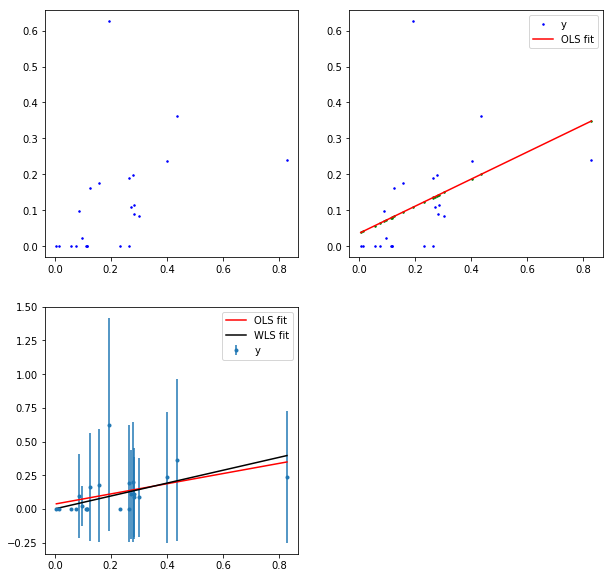

In [299]:
# follow the measure of the x and y label from the instruction

fig = pl.figure(figsize=(10,10)) 

ax1 = fig.add_subplot(221)
ax1.plot(df_['civ_firearmspp'],df_['shootingspp1000'],'b.',markersize = 3,)

ax2 = fig.add_subplot(222)
ax2.plot(df_['civ_firearmspp'],df_['shootingspp1000'],'b.',markersize = 3,label = 'y')
ax2.plot(df_['civ_firearmspp'],mod.predict(),'g.',markersize = 3,label = None)
ax2.plot(df_['civ_firearmspp'],mod.predict(),'r',label = 'OLS fit')
ax2.legend()

ax3 = fig.add_subplot(223)

ax3.plot(df_['civ_firearmspp'],mod.predict(),'r',label = 'OLS fit')
ax3.plot(df_['civ_firearmspp'],modW.predict(),'k',label = 'WLS fit')
ax3.errorbar(df_['civ_firearmspp'],df_['shootingspp1000'],
             yerr = np.sqrt(df_['shootingspp1000']),fmt = '.',label = 'y')
ax3.legend()



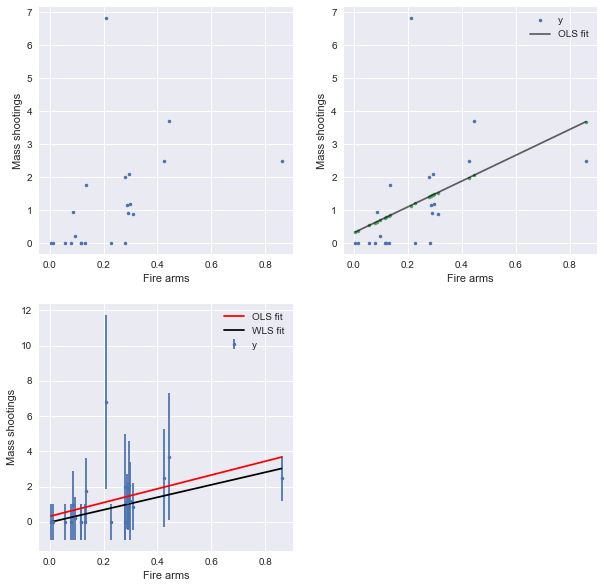

the plots should look something like this (not necessarily exactly, due to the choices of the error


## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



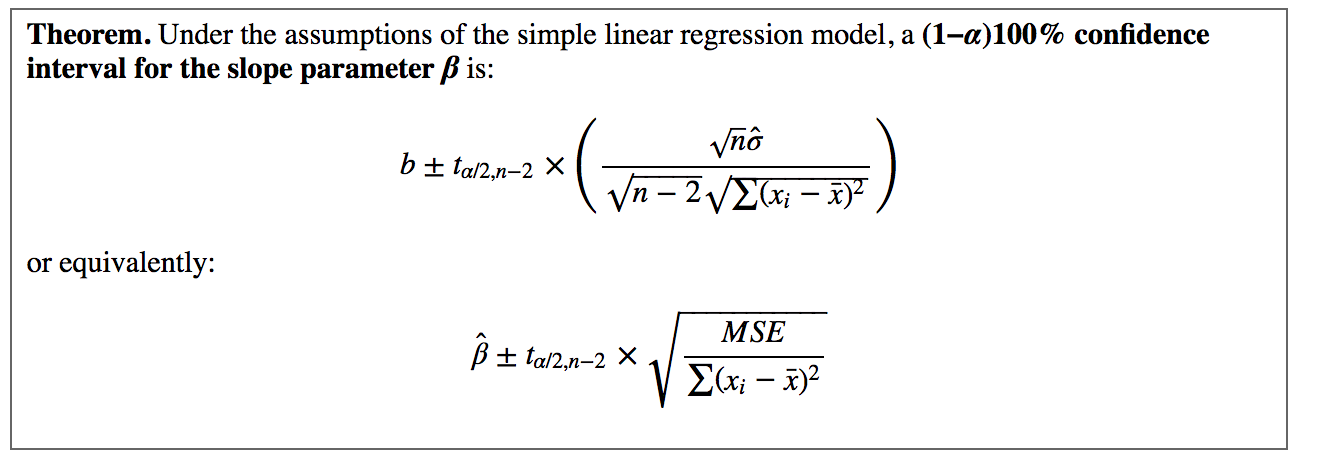

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

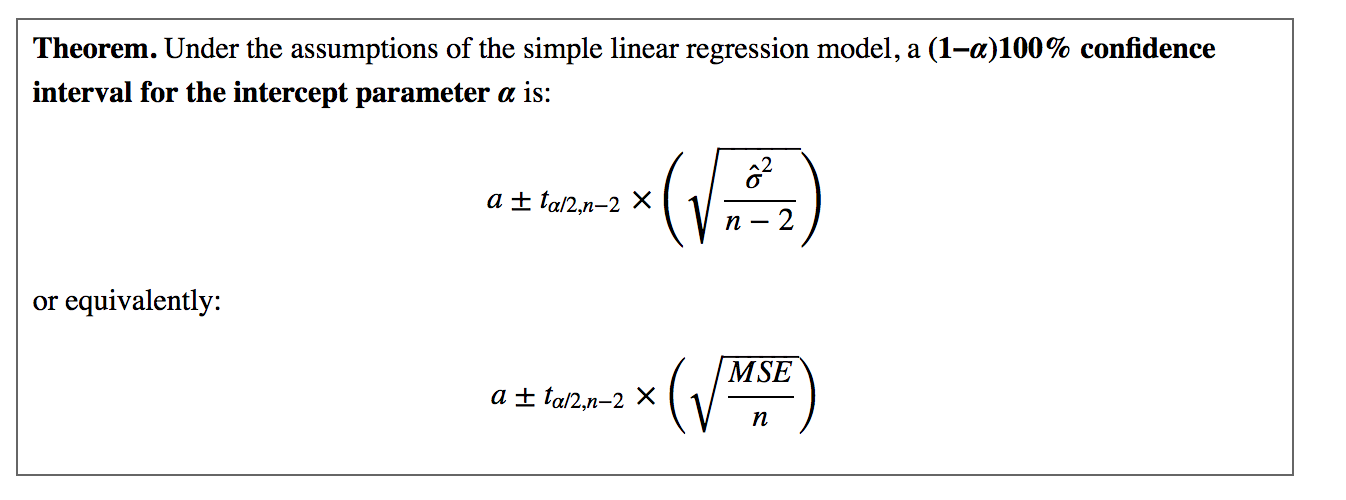

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

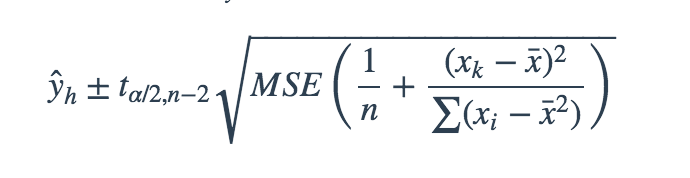

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

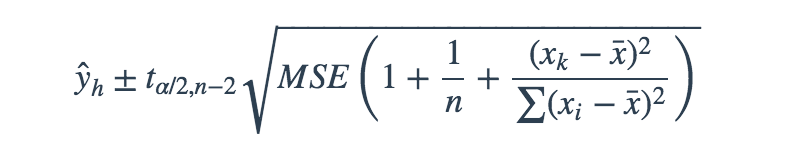

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [302]:
df_.tail(2)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp,shootingspp,shootingspp1000
8,Finland,2.518849e+11,5511303.0,2400000.0,24.0,Finland,45.3,2,0.435469,0.000363,0.362891
22,United States,1.939060e+13,325719178.0,270000000.0,9146.0,United States,88.8,78,0.828935,0.000239,0.239470


In [303]:
# follow the measurement unit from the introduction
df_['shootingspp1e4'] = df_['shootingspp1000']*10

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


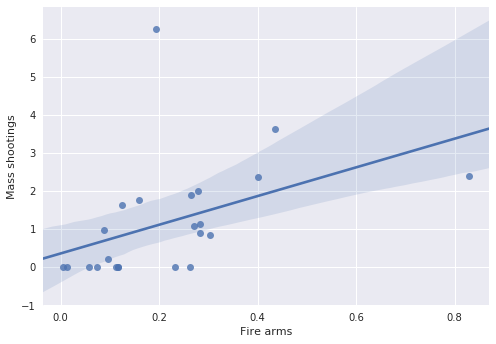

In [304]:
pl.figure()
import seaborn  as sns
sns.regplot(x="civ_firearmspp", y="shootingspp1e4", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [315]:
# change the index as country name
df_2 = df_.set_index("Country Name");df_.head(2)

,Country Name,gdp,pop,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,civ_firearmspp,shootingspp,shootingspp1000,shootingspp1e4
15,Japan,4.872137e+12,126785797.0,710000.0,11.0,Japan,0.6,0,0.00560,0.0,0.0,0.0
19,Poland,5.245096e+11,37975841.0,510000.0,35.0,Poland,1.3,0,0.01343,0.0,0.0,0.0


In [320]:
mod2 = smf.ols(formula = 'shootingspp1000~civ_firearmspp',data = df_2).fit()


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


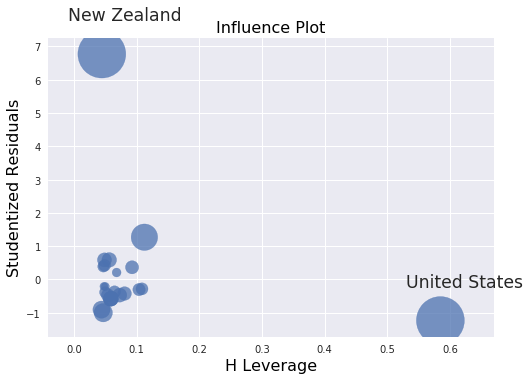

In [321]:
sm.graphics.influence_plot(mod2, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

In [344]:
# Extra credit
x = df_["civ_firearmspp"].tolist()
y = df_["shootingspp1e4"].tolist()
x_mu = np.mean(x)
ypre = modW.predict()
x_gap = x-x_mu
gap2 = x_gap**2
var = gap2.sum()
N = len(x)
residual = y-ypre

In [335]:
# Calculate H leverage for WLS model

H_lever = 1.0/(N*1.0) + gap2/var

In [336]:
H_lever

array([ 0.10843362,  0.1037206 ,  0.08061786,  0.07293137,  0.0679412 ,
        0.06460378,  0.05936778,  0.05848709,  0.05814425,  0.056117  ,
        0.04854224,  0.04434538,  0.04379985,  0.04657904,  0.0467598 ,
        0.04764171,  0.04880979,  0.04971781,  0.04985408,  0.05390953,
        0.09258276,  0.11229955,  0.5847939 ])

In [338]:
sigma2 = var/(1-H_lever)

In [359]:
# residual standard error 
se = np.sqrt(var/(N-1))

In [360]:
# Calculate Standard Residual
sr = residual/(np.sqrt(1-H_lever)*se)

In [361]:
sr

array([ -1.59767375e-02,  -3.82136275e-02,  -1.60852678e-01,
        -2.09244011e-01,   5.43463738e+00,   9.83755416e-01,
        -3.12920993e-01,  -3.20950307e-01,  -3.24138637e-01,
         9.10159447e+00,   9.73778730e+00,   3.55940540e+01,
        -6.40049466e-01,  -7.27547631e-01,   1.02112352e+01,
         5.55311158e+00,   1.07265566e+01,   4.39280161e+00,
         5.78777877e+00,   4.07391985e+00,   1.28595885e+01,
         2.04908178e+01,   1.75072190e+01])

#### Calculation

** I am trying to calculate the H_leverage and Standard Residual.The H_levelage is bound between 0 to 1 and Residual standard deviation to measure the goodness of fit. **